In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn import preprocessing

from sklearn.metrics.pairwise import cosine_similarity
from scipy import spatial

# Load data set and display first few observations
dataset = pd.read_csv("RWSGwn.emb",skiprows=1,header=None,delim_whitespace=True)
dataset.set_index(dataset.columns.tolist()[0], inplace=True, drop=True)
dataset.head()


,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
0,,,,,,,,,,,,,,,,,,,,,
</s>,0.001134,-0.001567,-0.000553,-0.000446,-0.000318,0.001013,-0.001402,-0.001523,-0.000830,0.001383,...,0.001433,0.000340,0.000157,0.001359,0.001491,0.000083,-0.001199,-0.000949,-0.000011,-0.000126
person,0.001942,0.314056,0.229922,0.155945,0.074058,-0.003026,0.054890,0.117786,-0.086572,-0.000060,...,-0.070007,-0.110504,0.079577,-0.457270,-0.005678,0.081342,-0.260409,0.123642,-0.006796,0.171438
make,0.187999,0.058622,0.153890,0.046639,0.139083,0.119673,-0.077484,0.149625,0.093487,0.351879,...,-0.255565,0.275326,0.001808,-0.133839,0.149788,-0.042560,0.017474,0.374460,-0.301578,-0.410514
not,-0.015018,0.182143,-0.106171,-0.078256,-0.192224,-0.178518,0.130684,0.084506,0.050392,-0.188987,...,0.052207,0.040722,0.130083,-0.146682,0.136849,-0.056866,0.008767,0.133545,0.112558,-0.233173
way,0.279636,0.124893,0.033123,-0.005594,0.060220,0.216021,-0.096573,0.008295,0.160349,-0.002520,...,-0.237020,-0.106970,-0.031615,-0.225414,0.159304,0.288393,-0.213436,0.432983,-0.005310,-0.187375


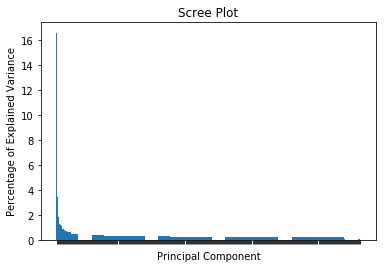

In [2]:
scaled_data = preprocessing.scale(dataset.T)
 
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['']
per_var

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()


In [48]:

features= dataset.index
# Separating out the features
x = dataset
# Separating out the target
y = dataset.index
# Standardizing the features
scaler = StandardScaler()
scaler.fit(x)
xst = scaler.transform(x)
pca = PCA(n_components = 50)
pca.fit(xst)

xpt = pca.transform(x)

newdata = pd.DataFrame(xpt, index = features)
newdata.head()



,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,,,,,,,,,,,,,,,,,,,,,
</s>,0.000518,0.001937,-0.000018,-0.002351,0.000701,0.000781,0.000485,-0.000578,0.000690,0.000564,...,0.000550,-0.000003,0.000116,0.000684,-0.000418,-0.000323,-0.000178,-0.000745,0.000886,-0.000528
person,-1.265031,0.340827,0.189330,-0.538292,0.285187,-0.683488,-0.019503,0.465532,-0.154558,0.228412,...,-0.030757,0.053416,-0.132639,-0.051607,0.046548,0.198129,-0.198949,0.072563,-0.283825,-0.153709
make,-0.422588,-0.495195,-0.318423,-0.502127,-0.675300,0.028271,-0.210346,0.255640,0.299019,-0.330008,...,0.137121,0.437666,-0.259784,0.160558,0.117299,0.360747,0.003130,0.042594,-0.078207,0.241247
not,-0.678251,-0.368223,0.772364,-0.100643,-0.082344,0.294194,0.693675,-0.043666,-0.059778,-0.553930,...,0.131766,0.015461,-0.082853,0.129314,0.061293,-0.104322,-0.083993,-0.149636,0.003220,-0.082120
way,-1.120506,-0.164881,1.294691,-0.445634,-0.165425,0.751317,-0.511339,-0.575759,0.447803,-0.212437,...,0.165553,0.172181,0.062939,-0.194821,0.086736,-0.082306,-0.056400,-0.170863,-0.005381,0.061388


In [81]:
from sklearn.metrics.pairwise import check_pairwise_arrays
from sklearn.preprocessing import normalize
from sklearn.utils.extmath import safe_sparse_dot

def cosine_similarity(X, Y=None, dense_output=True):
    X, Y = check_pairwise_arrays(X, Y)

    X_normalized = normalize(X, copy=True)
    if X is Y:
        Y_normalized = X_normalized
    else:
        Y_normalized = normalize(Y, copy=True)

    K = safe_sparse_dot(X_normalized, Y_normalized.T, dense_output=dense_output)

    return K

search_depth = 10000
def similar_words(searchword):
    if searchword not in newdata.index:
        return "not found"
    else:
        searchwordvector = newdata.loc[searchword]
        vec = np.array(searchwordvector).reshape(1, -1)
        similarityscores = cosine_similarity(newdata.values[0:search_depth],vec)
        similarities =  pd.DataFrame(similarityscores,index=newdata.index[0:search_depth],columns=['similarity'])
        similarities.sort_values(by='similarity', ascending=False,inplace=True)
        return similarities[1:6]



In [82]:
similar_words('man')


,similarity
0,
woman,0.796697
young_man,0.768034
mistress,0.719533
girl,0.718572
bodyguard,0.671994
